In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### بارگذاری دیتاست و مشاهده اولیه

In [3]:
# loading dataset
dataset = pd.read_csv("data/dataset.csv")

In [4]:
# display first 5 rows of dataset
dataset.head()

,study_hours_per_week,sleep_hours_per_day,attendance_percentage,assignments_completed,final_grade,participation_level,internet_access,parental_education,extracurricular,part_time_job
0,52.72,6.85,0.99,0.22,71.10,medium,Yes,NaN,Yes,No
1,42.14,8.82,0.88,0.56,62.24,medium,Yes,NaN,No,No
2,55.24,2.20,0.68,1.00,65.27,medium,Yes,NaN,Yes,No
3,69.83,6.13,0.52,0.22,66.61,low,Yes,NaN,Yes,No
4,40.54,3.70,0.83,0.33,58.97,medium,Yes,High School,Yes,No


In [5]:
# display dataset information
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   study_hours_per_week   500 non-null    float64
 1   sleep_hours_per_day    500 non-null    float64
 2   attendance_percentage  500 non-null    float64
 3   assignments_completed  500 non-null    float64
 4   final_grade            500 non-null    float64
 5   participation_level    500 non-null    object 
 6   internet_access        500 non-null    object 
 7   parental_education     287 non-null    object 
 8   extracurricular        500 non-null    object 
 9   part_time_job          500 non-null    object 
dtypes: float64(5), object(5)
memory usage: 39.2+ KB


### شاخص های اماری توصیفی 

In [6]:
# display summary statistics for numeric features
dataset.describe()

,study_hours_per_week,sleep_hours_per_day,attendance_percentage,assignments_completed,final_grade
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,44.560240,5.063880,0.684280,0.533540,63.753240
std,16.232416,1.949214,0.214905,0.277497,7.114181
min,0.000000,0.000000,0.000000,0.000000,40.200000
25%,32.770000,3.812500,0.530000,0.330000,58.812500
50%,44.655000,5.060000,0.700000,0.560000,63.825000
75%,55.057500,6.302500,0.842500,0.780000,68.587500
max,100.000000,10.000000,1.000000,1.000000,92.010000


### بررسی مقادیر گمشده و غیرعادی + تبدیل داده های nominal به numeric

In [7]:
# function to preprocess categorical features to numeric and handle missing values
def preprocess_categorical(df):
    df['participation_level'] = df['participation_level'].map({'low': 1, 'medium': 2, 'high': 3})
    df['parental_education'] = df['parental_education'].map({'High School': 1, 'Master': 2, 'PhD': 3}).fillna(0)
    df['internet_access'] = df['internet_access'].map({'Yes': 1, 'No': 0})
    df['extracurricular'] = df['extracurricular'].map({'Yes': 1, 'No': 0})
    df['part_time_job'] = df['part_time_job'].map({'Yes': 1, 'No': 0})
    return df

In [8]:
# process categorical features
dataset = dataset.pipe(preprocess_categorical)

In [9]:
# function to handle outliers and Irrational values in the dataset
def handle_outliers(df):
    df.loc[(df['sleep_hours_per_day'] < 3) | (df['sleep_hours_per_day'] > 16), 'sleep_hours_per_day'] = np.nan
    df.loc[(df['attendance_percentage'] < 0) | (df['attendance_percentage'] > 1), 'attendance_percentage'] = np.nan
    df.loc[(df['final_grade'] < 0) | (df['final_grade'] > 100), 'final_grade'] = np.nan
    df.loc[df['study_hours_per_week'] < 0, 'study_hours_per_week'] = np.nan
    return df

In [10]:
# handle outliers and Irrational values
dataset = dataset.pipe(handle_outliers)

In [11]:
# display dataset information after preprocessing
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   study_hours_per_week   500 non-null    float64
 1   sleep_hours_per_day    430 non-null    float64
 2   attendance_percentage  500 non-null    float64
 3   assignments_completed  500 non-null    float64
 4   final_grade            500 non-null    float64
 5   participation_level    500 non-null    int64  
 6   internet_access        500 non-null    int64  
 7   parental_education     500 non-null    float64
 8   extracurricular        500 non-null    int64  
 9   part_time_job          500 non-null    int64  
dtypes: float64(6), int64(4)
memory usage: 39.2 KB


In [12]:
# handle missing values in sleep_hours_per_day by replacing with mean
mean_sleep_hours_per_day = dataset['sleep_hours_per_day'].mean()
dataset['sleep_hours_per_day'] = dataset['sleep_hours_per_day'].fillna(mean_sleep_hours_per_day)

### نمودار دایره ای

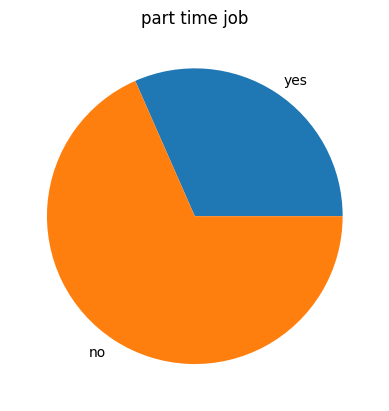

In [13]:
# visualize the distribution of part_time_job feature
x = [np.sum(dataset.iloc[:,9]), dataset.iloc[:,9].shape[0]-np.sum(dataset.iloc[:,9])]
labels = ['yes','no']

plt.pie(x ,labels=labels)
plt.title('part time job')
plt.show()

### نمودار هیستوگرام و جعبه ای 

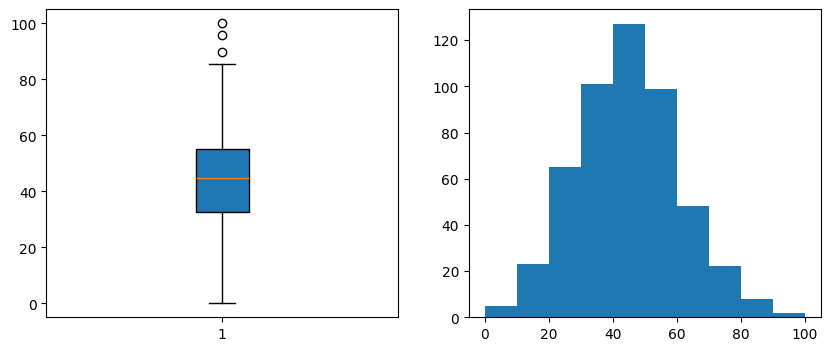

In [26]:
# display boxplot and histogram for study_hours_per_week feature
fig, axes = plt.subplots(1, 2,figsize=(10,4))
axes[0].boxplot(dataset['study_hours_per_week'], patch_artist=True);
axes[1].hist(dataset['study_hours_per_week']);

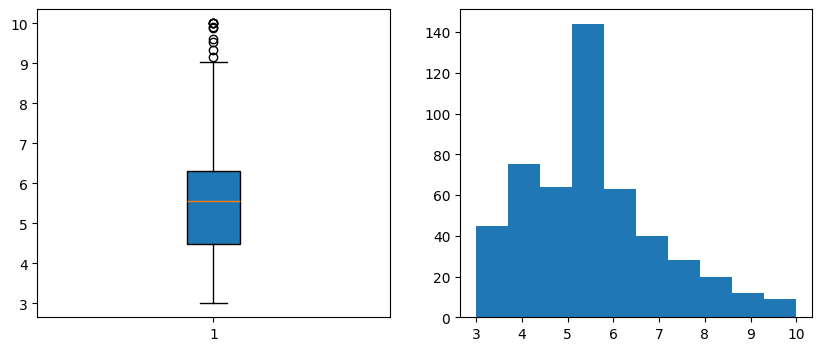

In [38]:
# display boxplot and histogram for study_hours_per_week feature
fig, axes = plt.subplots(1, 2,figsize=(10,4))
axes[0].boxplot(dataset['sleep_hours_per_day'], patch_artist=True);
axes[1].hist(dataset['sleep_hours_per_day']);

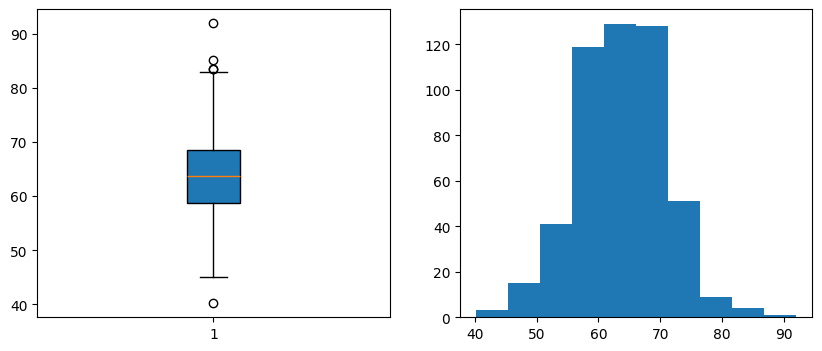

In [39]:
# display boxplot and histogram for final_grade feature
fig, axes = plt.subplots(1, 2,figsize=(10,4))
axes[0].boxplot(dataset['final_grade'],patch_artist=True);
axes[1].hist(dataset['final_grade']);

### نمودار همبستگی و انتخاب ویژگی ها

In [40]:
# create correlation matrix
corr_matrix = dataset.corr()

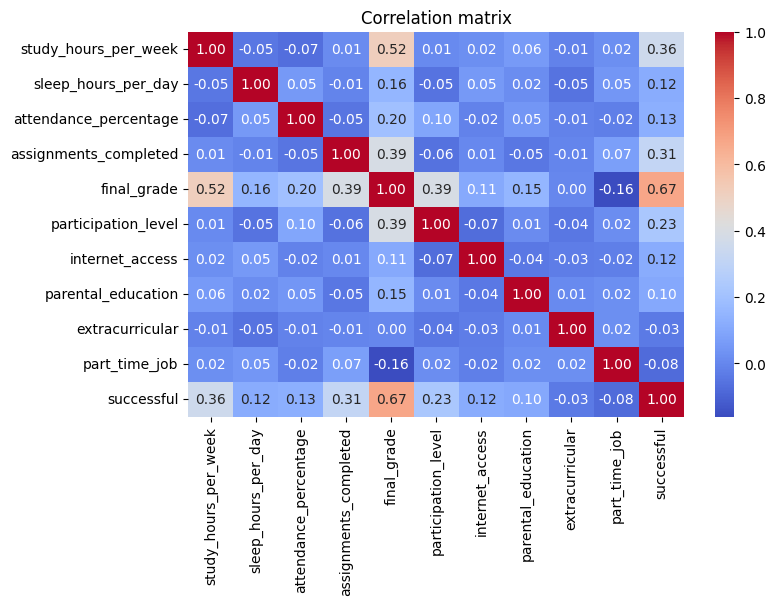

In [ ]:
# visualize correlation matrix using heatmap
plt.figure(figsize=(8,5))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True, fmt='.2f')
plt.title('Correlation matrix')
plt.show()

Text(0.5, 0, 'assignments_completed')

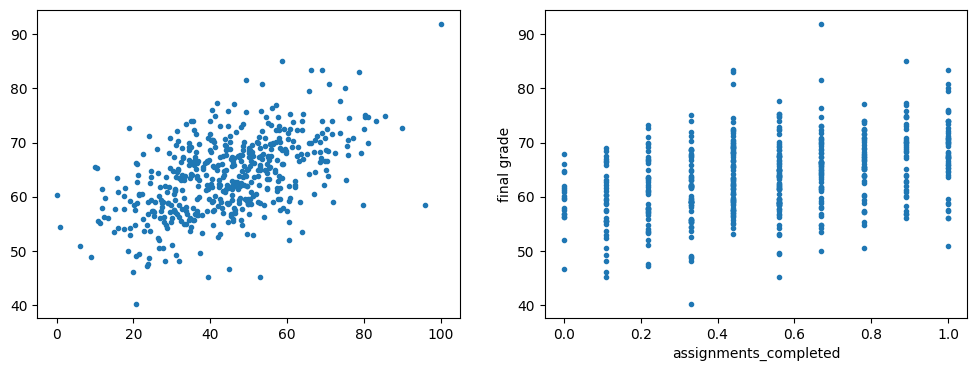

In [42]:
# selecting features that have high correlation with final_grade
features = ['study_hours_per_week', 'assignments_completed']
target = dataset['final_grade']

# visualize the relationship between selected features and target variable
fig, axes = plt.subplots(1, 2,figsize=(12,4))
plt.ylabel('final grade')
plt.xlabel(features[0])
axes[0].plot(dataset[features[0]], target, 'o', markersize=3);

axes[1].plot(dataset[features[1]], target, 'o', markersize=3);
plt.ylabel('final grade')
plt.xlabel(features[1])

### هیستوگرام تفکیکی بر اساس عملکرد

In [44]:
# create binary target variable 'successful' where final_grade >= 70 is considered successful
dataset['successful'] = pd.DataFrame(dataset['final_grade'].values >= 70).map(lambda x: 1 if x else 0)

In [45]:
# display first 5 rows of updated dataset
dataset.head()

,study_hours_per_week,sleep_hours_per_day,attendance_percentage,assignments_completed,final_grade,participation_level,internet_access,parental_education,extracurricular,part_time_job,successful
0,52.72,6.85000,0.99,0.22,71.10,2,1,0.0,1,0,1
1,42.14,8.82000,0.88,0.56,62.24,2,1,0.0,0,0,0
2,55.24,5.56514,0.68,1.00,65.27,2,1,0.0,1,0,0
3,69.83,6.13000,0.52,0.22,66.61,1,1,0.0,1,0,0
4,40.54,3.70000,0.83,0.33,58.97,2,1,1.0,1,0,0


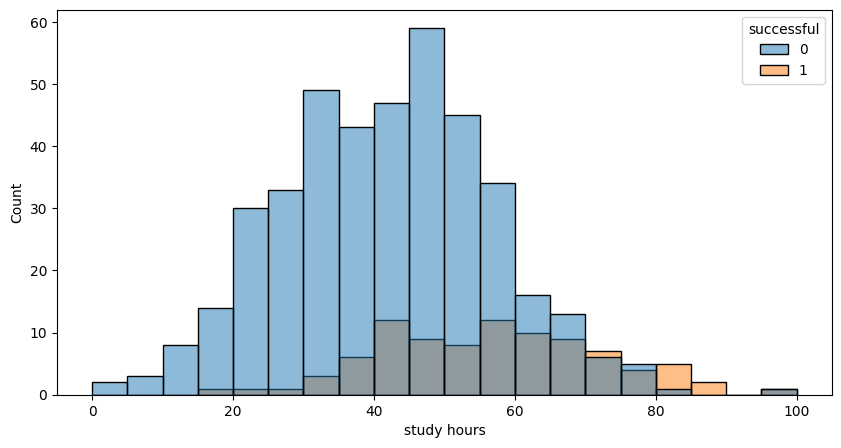

In [46]:
# display distribution of study_hours_per_week feature based on successful target variable for classification task
plt.figure(figsize=(10,5))
sns.histplot(data=dataset, x='study_hours_per_week', bins=20, hue='successful')
plt.xlabel("study hours")
plt.ylabel("Count")
plt.show() 

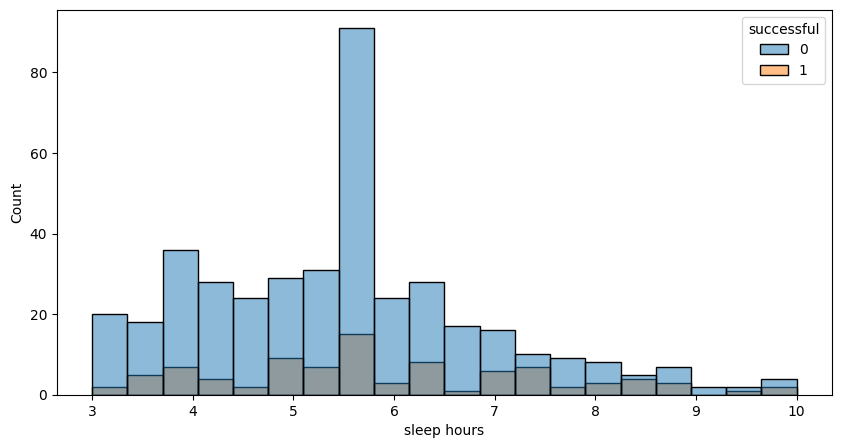

In [47]:
# display distribution of study_hours_per_week feature based on successful target variable for classification task
plt.figure(figsize=(10,5))
sns.histplot(data=dataset, x='sleep_hours_per_day', bins=20, hue='successful')
plt.xlabel("sleep hours")
plt.ylabel("Count")
plt.show() 

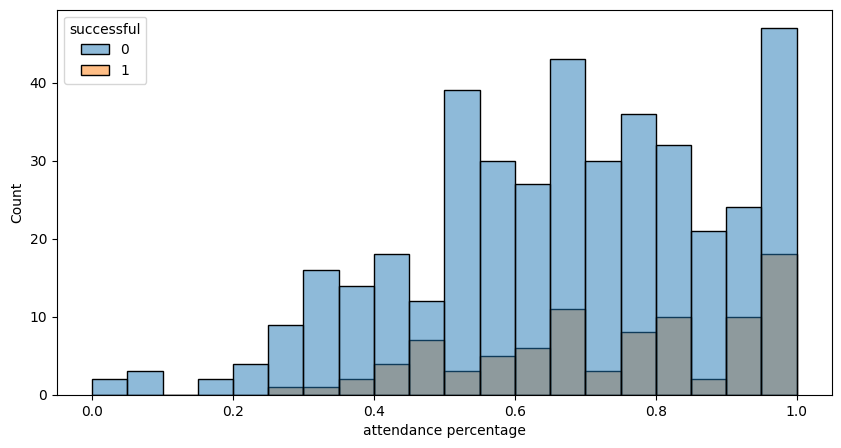

In [48]:
# display distribution of attendance_percentage feature based on successful target variable for classification task
plt.figure(figsize=(10,5))
sns.histplot(data=dataset, x='attendance_percentage', bins=20, hue='successful')
plt.xlabel("attendance percentage")
plt.ylabel("Count")
plt.show() 

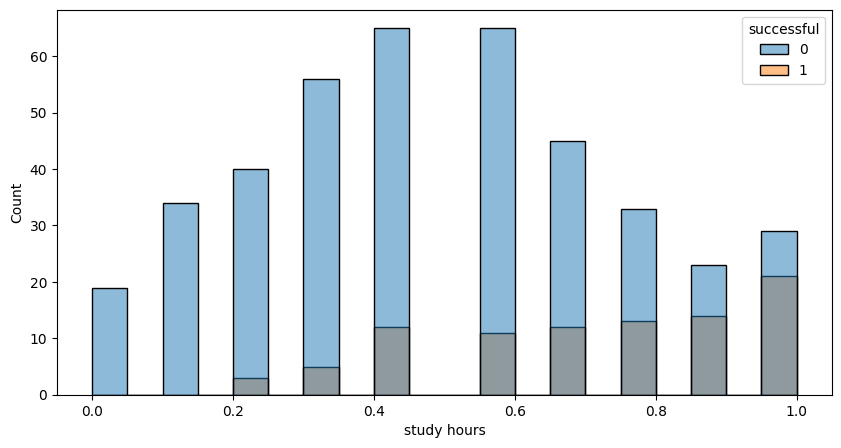

In [49]:
# display distribution of assignments_completed feature based on successful target variable for classification task
plt.figure(figsize=(10,5))
sns.histplot(data=dataset, x='assignments_completed', bins=20, hue='successful')
plt.xlabel("study hours")
plt.ylabel("Count")
plt.show() 

### نمودار نقاط(Scatter plot)

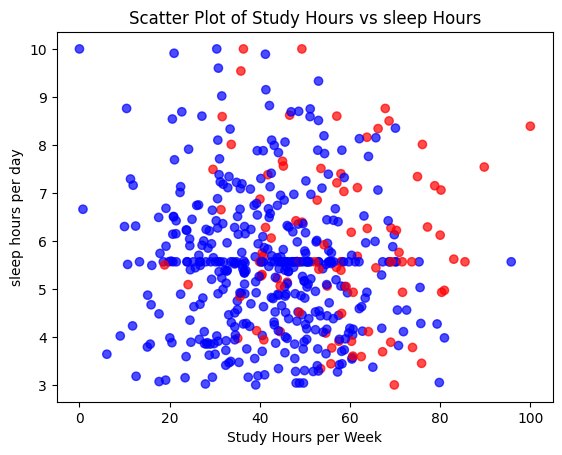

In [74]:
# display scatter plot of study_hours_per_week vs attendance_percentage colored by successful target variable for classification task
plt.scatter(dataset['study_hours_per_week'], dataset['sleep_hours_per_day'], c=dataset['successful'], cmap='bwr', alpha=0.7)
plt.xlabel('Study Hours per Week')
plt.ylabel('sleep hours per day')
plt.title('Scatter Plot of Study Hours vs sleep Hours')
plt.show()

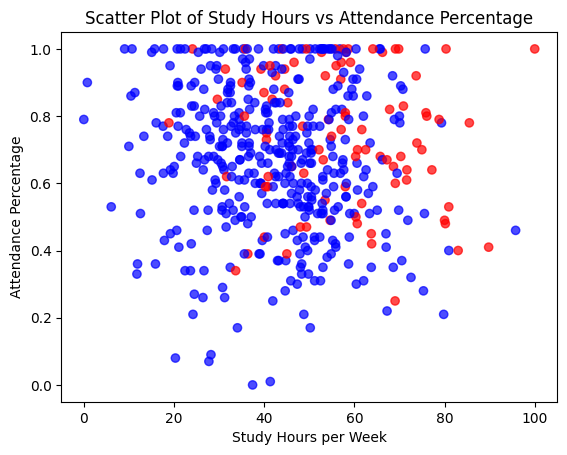

In [75]:
# display scatter plot of sleep_hours_per_day vs final_grade colored by successful target variable for classification task
plt.scatter(dataset['study_hours_per_week'], dataset['attendance_percentage'], c=dataset['successful'], cmap='bwr', alpha=0.7)
plt.xlabel('Study Hours per Week')
plt.ylabel('Attendance Percentage')
plt.title('Scatter Plot of Study Hours vs Attendance Percentage')
plt.show()

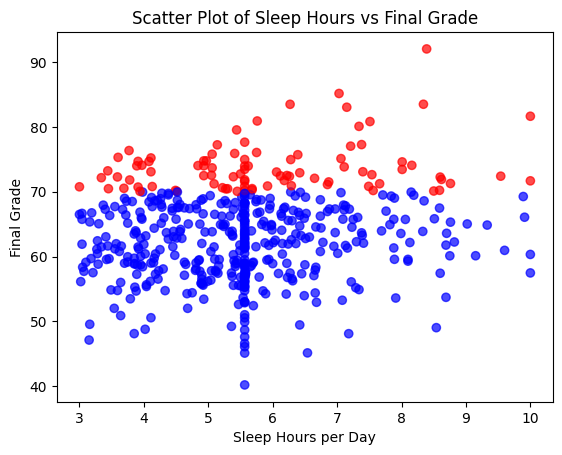

In [76]:
# display scatter plot of sleep_hours_per_day vs final_grade colored by successful target variable for classification task
plt.scatter(dataset['sleep_hours_per_day'], dataset['final_grade'], c=dataset['successful'], cmap='bwr', alpha=0.7)
plt.xlabel('Sleep Hours per Day')
plt.ylabel('Final Grade')
plt.title('Scatter Plot of Sleep Hours vs Final Grade')
plt.show()